In [1]:
import os
from read_file import *
from analyse_file import *
import numpy as np
from utils import *

/***                                  
 *             ,%%%%%%%%,             
 *           ,%%/\%%%%/\%%            
 *          ,%%%\c "" J/%%%           
 * %.       %%%%/ o  o \%%%           
 * `%%.     %%%%    _  |%%%           
 *  `%%     `%%%%(__Y__)%%%           
 *  //       ;%%%%`\-/%%%%            
 * ((       /  `%%%%%%%%              
 *  \    ./          |               
 *   \  /       \  | |               
 *    \/         ) | |               
 *     \         /_ | |__             
 *     (___________))))))) ZZC GO!~   


In [2]:
# txt_obb_path = '/home/zzc/All/research/AerialDetection/work_dirs/zzcLab/PPSeg/faster_rcnn_RoITrans_r50_fpn_1x_ppseg/Task1_results/'
txt_obb_path = '/home/zzc/All/research/AerialDetection/work_dirs/zzcLab/PPSeg/faster_rcnn_obb_r50_fpn_1x_ppseg/Task1_results/'
img_dir = '/home/zzc/All/datasets/DOTA_series/PPSeg/cropData/cropped_images/'
json_path = '/home/zzc/All/datasets/DOTA_series/PPSeg/splitData/test_obb.json'

In [3]:
pred_dict = read_txt(txt_obb_path, img_dir, format='DOTA', ext='png')
gt_dict = read_json(json_path, format='COCO')

[INFO]    [Sun Jun 13 16:51:28 2021] [zzc]:  Start to load the txt dir
[INFO]    [Sun Jun 13 16:51:28 2021] [zzc]:  Start to load the txt results...
[INFO]    [Sun Jun 13 16:51:28 2021] [zzc]:  class_map:  {0: 'A220', 1: 'C-130', 2: 'Y-12', 3: 'Boeing747', 4: 'Boeing737-800', 5: 'other', 6: 'ARJ21', 7: 'A321', 8: 'A330'}


A330: 100%|██████████████████████████████████████████████████████| 204/204 [00:00<00:00, 292.06it/s]


[INFO]    [Sun Jun 13 16:51:37 2021] [zzc]:  Finish loading the txt dir!
[INFO]    [Sun Jun 13 16:51:37 2021] [zzc]:  Start to load the json annotations...


Loaded annotations: 100%|██████████████████████████████████████| 550/550 [00:00<00:00, 11798.69it/s]


[INFO]    [Sun Jun 13 16:51:37 2021] [zzc]:  class_map:  {1: 'A330', 2: 'Boeing747', 3: 'Boeing737-800', 4: 'ARJ21', 5: 'Y-12', 6: 'A220', 7: 'C-130', 8: 'other', 9: 'A321'}
[INFO]    [Sun Jun 13 16:51:38 2021] [zzc]:  Finish loading the json annotations!


In [4]:
annopath = r'/home/zzc/All/datasets/DOTA_series/PPSeg/rawData/labels_2/{:s}.json'
imagesetfile = r'/home/zzc/All/datasets/DOTA_series/PPSeg/splitData/test_obb.json'

# For DOTA-v1.5
# classnames = ['A330', 'Boeing747', 'Boeing737-800', 'ARJ21', 'Y-12', 'A220', 'C-130', 'other', 'A321']
classnames = ['Boeing747', 'Boeing737-800', 'ARJ21', 'Y-12', 'A220', 'other']
matrix = np.zeros([len(classnames), len(classnames)])

In [5]:
IoU_thresh = 0.5
print('IoU_thresh: ', IoU_thresh)
for i, classname_gt in enumerate(classnames):
#     print('classname_gt:', classname_gt)
    for j, classname_pred in enumerate(classnames):
#         print('classname_pred:', classname_pred)
        tp = voc_eval(pred_dict,
                        gt_dict,
                        imagesetfile,
                        classname_gt,
                        classname_pred,
                        ovthresh=IoU_thresh,
                        use_07_metric=True)
        matrix[i, j] = tp
print('matrix: ', matrix)

IoU_thresh:  0.5
matrix:  [[ 13.   6.   7.   0.  13.   0.]
 [ 10.  99.   9.   0.  72.   0.]
 [  3.  10.  17.   0.  26.   2.]
 [  0.   0.   0. 108.   0.  15.]
 [ 11.  27.   8.   0.  41.   2.]
 [  0.   0.   2.  15.   0.  29.]]


# Before nms

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Normalized confusion matrix
0.3333333333333333	0.15384615384615385	0.1794871794871795	0.0	0.3333333333333333	0.0
0.05263157894736842	0.5210526315789473	0.04736842105263158	0.0	0.37894736842105264	0.0
0.05172413793103448	0.1724137931034483	0.29310344827586204	0.0	0.4482758620689655	0.034482758620689655
0.0	0.0	0.0	0.8780487804878049	0.0	0.12195121951219512
0.12359550561797752	0.30337078651685395	0.0898876404494382	0.0	0.4606741573033708	0.02247191011235955
0.0	0.0	0.043478260869565216	0.32608695652173914	0.0	0.6304347826086957


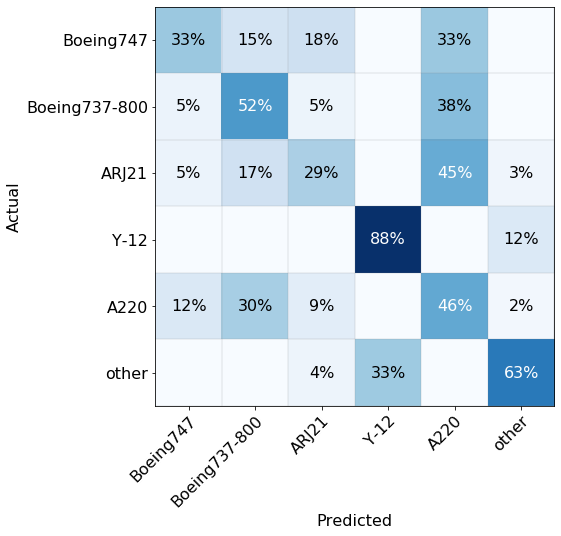

In [6]:
plot_Matrix(matrix, classnames, title=None,  cmap=plt.cm.Blues)

# After nms:

In [7]:
sim_classnames = ['B747', 'B787', 'ARJ21', 'Y-12', 'A220', 'other']

In [8]:
nms_pred_dict = classes_nms(pred_dict, thresh=0.5)

In [9]:
IoU_thresh = 0.5
print('IoU_thresh: ', IoU_thresh)
for i, classname_gt in enumerate(classnames):
#     print('classname_gt:', classname_gt)
    for j, classname_pred in enumerate(classnames):
#         print('classname_pred:', classname_pred)
        tp = voc_eval(nms_pred_dict,
                        gt_dict,
                        imagesetfile,
                        classname_gt,
                        classname_pred,
                        ovthresh=IoU_thresh,
                        use_07_metric=True)
        matrix[i, j] = tp
print('matrix: ', matrix)

IoU_thresh:  0.5
matrix:  [[ 11.   2.   4.   0.   2.   0.]
 [  0.  92.   0.   0.  24.   0.]
 [  2.   3.  10.   0.  17.   1.]
 [  0.   0.   0. 106.   0.   2.]
 [  0.  19.   0.   0.  23.   0.]
 [  0.   0.   0.   6.   0.  28.]]


Normalized confusion matrix
0.5789473684210527	0.10526315789473684	0.21052631578947367	0.0	0.10526315789473684	0.0
0.0	0.7931034482758621	0.0	0.0	0.20689655172413793	0.0
0.06060606060606061	0.09090909090909091	0.30303030303030304	0.0	0.5151515151515151	0.030303030303030304
0.0	0.0	0.0	0.9814814814814815	0.0	0.018518518518518517
0.0	0.4523809523809524	0.0	0.0	0.5476190476190477	0.0
0.0	0.0	0.0	0.17647058823529413	0.0	0.8235294117647058


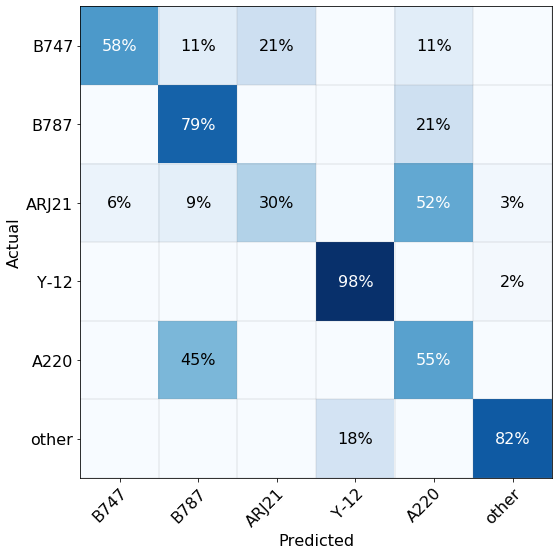

In [10]:
plot_Matrix(matrix, sim_classnames, title=None,  cmap=plt.cm.Blues)

# Optimized...

In [11]:
def random_change(matrix):
    for i in range(matrix.shape[0]):
        adds = 0
        for j in range(matrix.shape[1]):
            if matrix[i,j] == 0 or i == j:
                continue
            minus = int(random.random()*matrix[i,j]*0.5)
            if minus == 0 and random.random() > 0.5:
                minus = 1
            matrix[i,j] -= minus
            adds += minus
        matrix[i,i] += adds
    return matrix

In [12]:
matrix = random_change(matrix)
print(matrix)

[[ 13.   2.   3.   0.   1.   0.]
 [  0. 102.   0.   0.  14.   0.]
 [  1.   2.  13.   0.  16.   1.]
 [  0.   0.   0. 106.   0.   2.]
 [  0.  11.   0.   0.  31.   0.]
 [  0.   0.   0.   4.   0.  30.]]


Normalized confusion matrix
0.6842105263157895	0.10526315789473684	0.15789473684210525	0.0	0.05263157894736842	0.0
0.0	0.8793103448275862	0.0	0.0	0.1206896551724138	0.0
0.030303030303030304	0.06060606060606061	0.3939393939393939	0.0	0.48484848484848486	0.030303030303030304
0.0	0.0	0.0	0.9814814814814815	0.0	0.018518518518518517
0.0	0.2619047619047619	0.0	0.0	0.7380952380952381	0.0
0.0	0.0	0.0	0.11764705882352941	0.0	0.8823529411764706


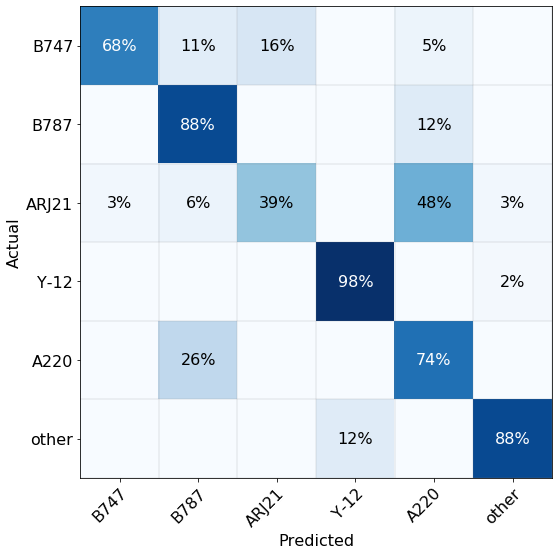

In [13]:
plot_Matrix(matrix, sim_classnames, title=None,  cmap=plt.cm.Blues)